In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Bareilly 
d1 = pd.read_csv("/kaggle/input/electricity-smart-meter-data-from-india/SM Cleaned Data BR Aggregated.csv")
#Mathura
d2 = pd.read_csv("/kaggle/input/electricity-smart-meter-data-from-india/SM Cleaned Data MH Aggregated.csv")
d2.shape, d1.shape

((16491, 3), (28119, 3))

In [4]:
d2.isnull().sum()

meter    0
Date     0
t_kWh    0
dtype: int64

In [5]:
d1.isnull().sum()

meter    0
Date     0
t_kWh    0
dtype: int64

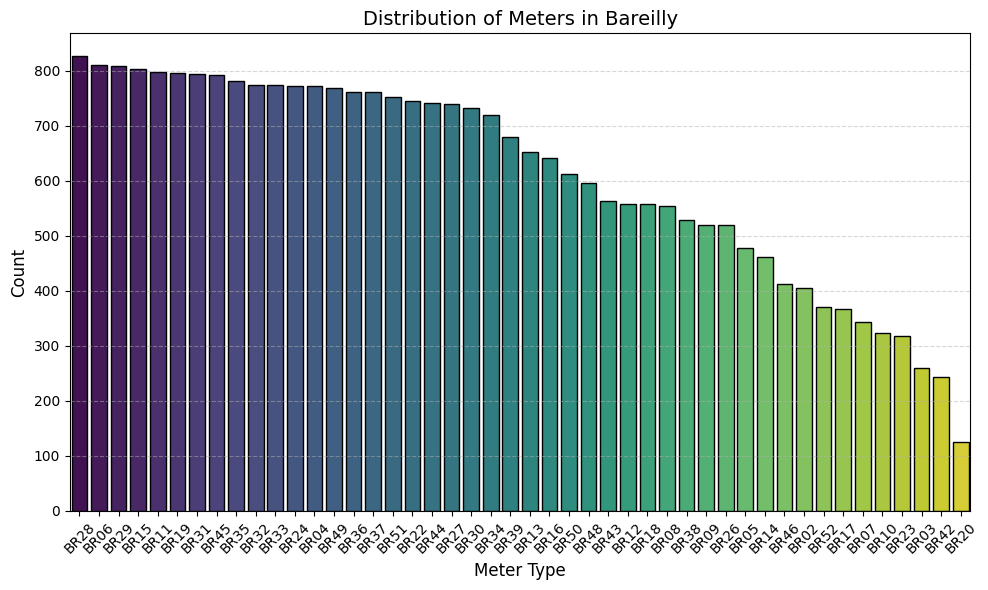

In [14]:
#The distribution of meters in Bareilly
counts_d1 = d1["meter"].value_counts()
meter_df = counts_d1.reset_index()
meter_df.columns = ["meter", "percentage"]
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=meter_df, x="meter", y="percentage", palette="viridis", edgecolor="black")
# Labels and title
plt.title("Distribution of Meters in Bareilly", fontsize=14)
plt.xlabel("Meter Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

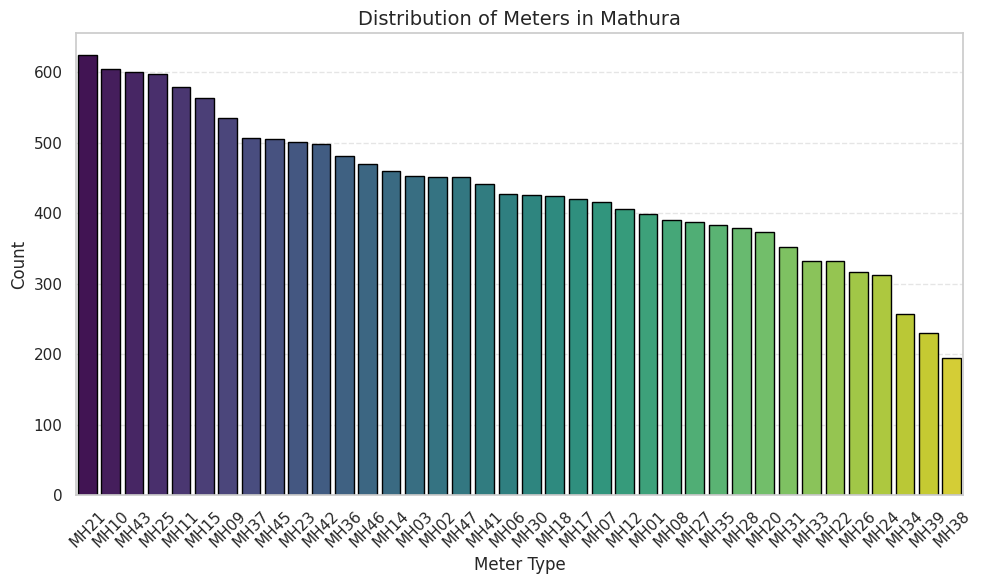

In [43]:
#The distribution of meters in Mathura
counts_d2 = d2["meter"].value_counts()
meter_df = counts_d2.reset_index()
meter_df.columns = ["meter", "percentage"]
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=meter_df, x="meter", y="percentage", palette="viridis", edgecolor="black")
# Labels and title
plt.title("Distribution of Meters in Mathura", fontsize=14)
plt.xlabel("Meter Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [17]:
# Step 1: Find the top 5 meters by count
top_meters = d1["meter"].value_counts().nlargest(5).index
# Step 2: Filter the DataFrame to include only rows with those meters
top_meter_readings = d1[d1["meter"].isin(top_meters)]
# View the result
top_meter_readings.head()

,meter,Date,t_kWh
1914,BR06,2019-07-11,13.076
1915,BR06,2019-07-12,13.644
1916,BR06,2019-07-13,12.394
1917,BR06,2019-07-14,14.326
1918,BR06,2019-07-15,16.690


In [18]:
top_meters

Index(['BR28', 'BR06', 'BR29', 'BR15', 'BR11'], dtype='object', name='meter')

Summary Statistics (Grouped by Meter) (Bareilly):

       count       mean       std    min       25%      50%       75%     max
meter                                                                        
BR06   810.0  15.817759  5.664773  6.060  12.45625  14.0245  16.82350  44.366
BR11   798.0   7.213888  2.936097  2.281   5.76375   6.6760   7.79025  24.131
BR15   804.0   8.635106  4.860564  1.784   5.21050   8.1980  11.06950  34.141
BR28   827.0   6.536221  3.215282  0.459   4.07200   5.6720   8.20900  17.117
BR29   809.0   7.992043  3.469525  1.143   5.18100   8.4490  10.57800  19.398


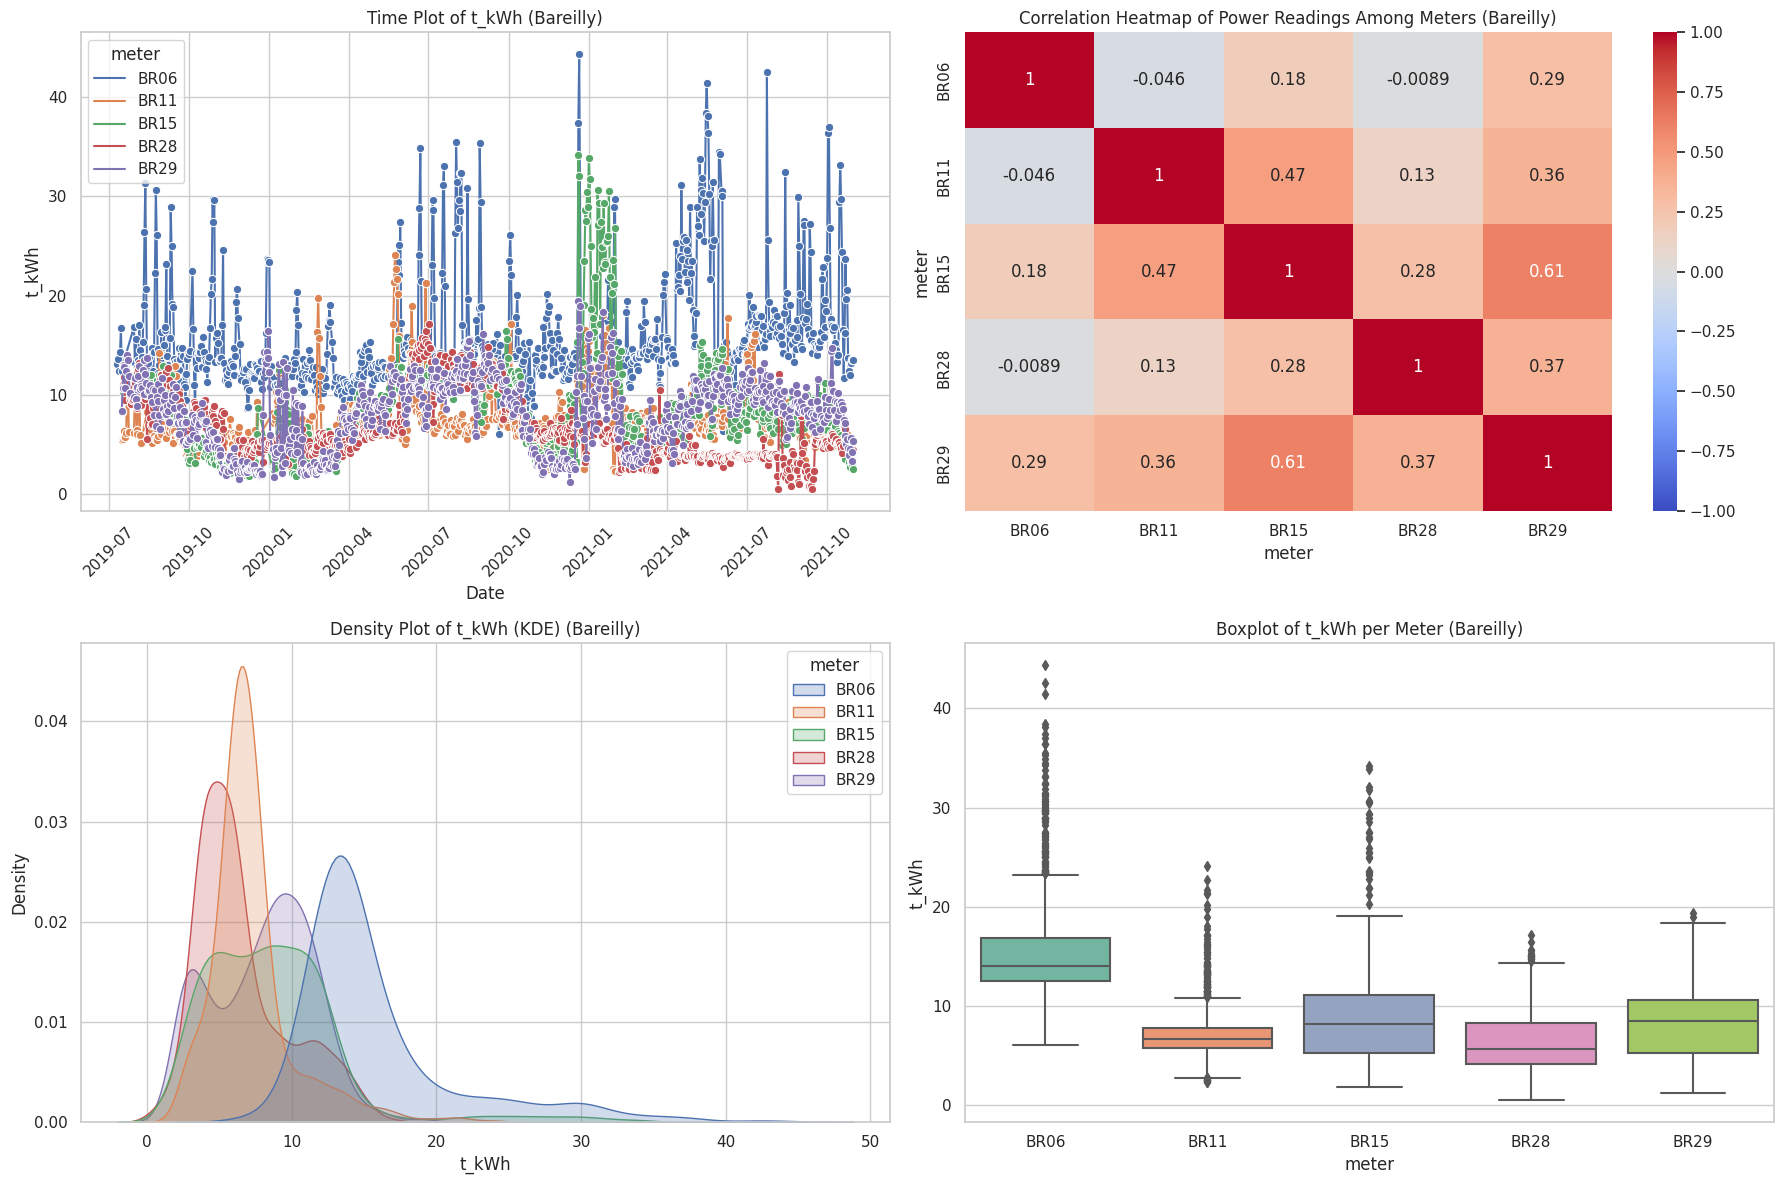

In [32]:
# Ensure Date is datetime
d1["Date"] = pd.to_datetime(d1["Date"])
# Top 5 meters
top_meters = ['BR28', 'BR06', 'BR29', 'BR15', 'BR11']
df_top = d1[d1["meter"].isin(top_meters)]
# Print summary statistics
summary_stats = df_top.groupby("meter")["t_kWh"].describe()
print("Summary Statistics (Grouped by Meter) (Bareilly):\n")
print(summary_stats)
# Set seaborn theme
sns.set(style="whitegrid")
# Pivot data: rows=Date, columns=meter, values=t_kWh
df_pivot = df_top.pivot(index="Date", columns="meter", values="t_kWh")
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
# Time Plot
sns.lineplot(data=df_top, x="Date", y="t_kWh", hue="meter", marker="o", ax=axs[0, 0])
axs[0, 0].set_title("Time Plot of t_kWh (Bareilly)")
axs[0, 0].tick_params(axis='x', rotation=45)
# Correlation Heatmap
corr = df_pivot.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axs[0, 1])
axs[0, 1].set_title("Correlation Heatmap of Power Readings Among Meters (Bareilly)")
# KDE Plot
sns.kdeplot(data=df_top, x="t_kWh", hue="meter", fill=True, ax=axs[1, 0])
axs[1, 0].set_title("Density Plot of t_kWh (KDE) (Bareilly)")
# Boxplot for Outlier Detection
sns.boxplot(data=df_top, x="meter", y="t_kWh", ax=axs[1, 1], palette="Set2")
axs[1, 1].set_title("Boxplot of t_kWh per Meter (Bareilly)")
# Final plot adjustments
plt.tight_layout()
plt.show()

**Observations:**
The summary statistics reveal notable differences in power consumption patterns among the top five meters in Bareilly. Meter BR06 stands out with the highest average power consumption of approximately 15.82 kWh, which is almost double that of most other meters. Additionally, it exhibits a wide range of values—from a minimum of 6.06 kWh to a peak of 44.37 kWh—and a standard deviation of 5.66, indicating significant variability in consumption. This suggests that BR06 likely serves a high-demand consumer or location, such as a commercial establishment or a densely used residential area.

In contrast, meter BR28 recorded the lowest mean consumption at about 6.54 kWh, with a much narrower range and a minimum reading as low as 0.46 kWh. This pattern indicates relatively low and possibly intermittent usage, which may reflect smaller households or lower operational hours.

Meters BR11, BR15, and BR29 fall in the mid-range, with mean consumption values of 7.21 kWh, 8.64 kWh, and 7.99 kWh respectively. While their average consumption is moderate, meter BR15 displays a somewhat wider spread (from 1.78 to 34.14 kWh) and a standard deviation of 4.86, suggesting the presence of occasional high-usage days or outliers.

Overall, BR06 demonstrates the most intense and variable usage, while BR28 reflects consistent low consumption. These differences highlight the diverse energy demands across different users or zones in Bareilly and point to BR06 as a candidate for further investigation or optimization in energy usage.

In [27]:
# Find the top 5 meters by count in Bareilly
top_meters = d2["meter"].value_counts().nlargest(5).index
top_meters

Index(['MH21', 'MH10', 'MH43', 'MH25', 'MH11'], dtype='object', name='meter')

Summary Statistics (Grouped by Meter) (Mathura):

       count       mean        std    min      25%      50%       75%     max
meter                                                                        
MH10   605.0  16.292455  13.008333  0.277  4.36500  11.7850  26.68400  59.770
MH11   579.0  12.184389   6.618989  0.050  5.09600  13.0310  18.48600  22.944
MH21   624.0   9.800045   6.480340  0.602  3.33225   8.9195  15.57425  29.378
MH25   597.0   9.658643   5.220431  1.919  5.33500   7.8420  13.70000  28.392
MH43   600.0  12.151405   7.353556  3.174  5.13975  10.3475  18.41275  35.663


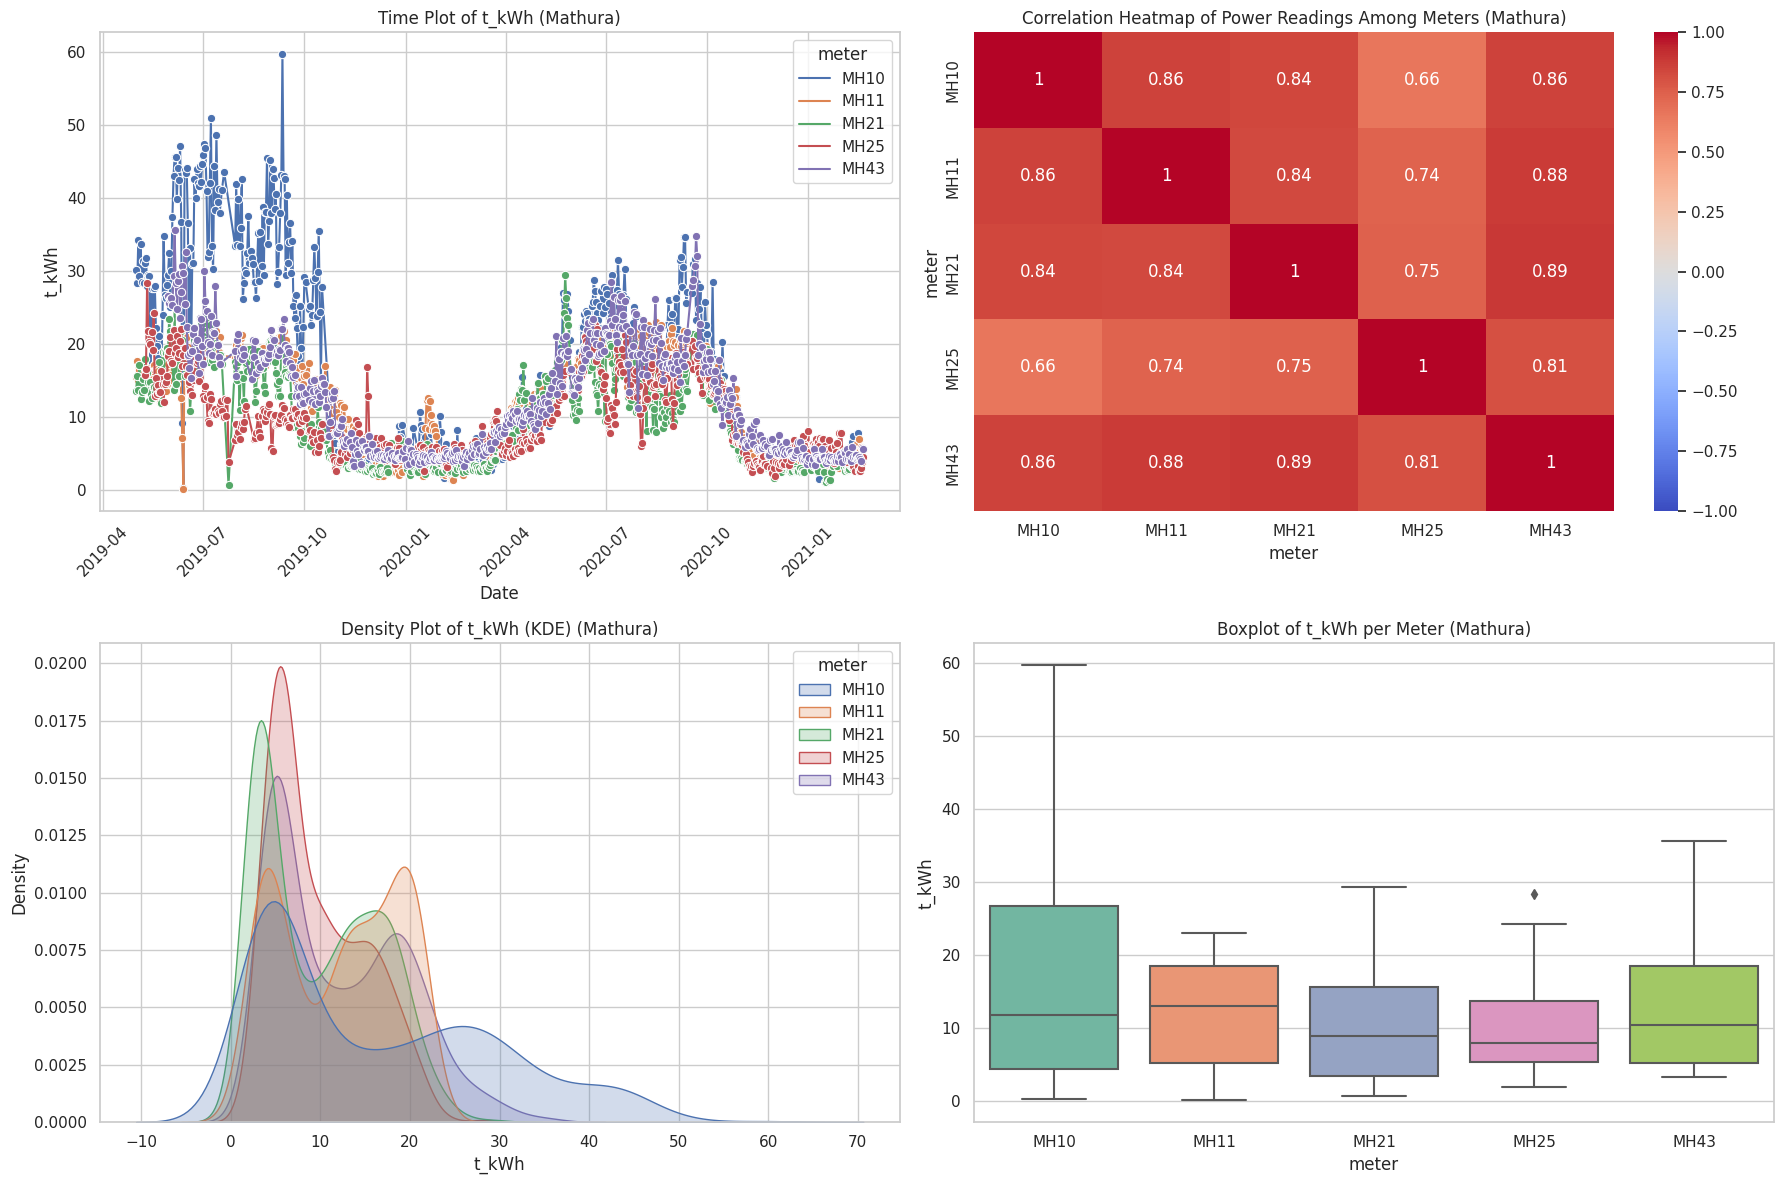

In [33]:
# Ensure Date is datetime
d2["Date"] = pd.to_datetime(d2["Date"])
# Top 5 meters
top_meters = ['MH21', 'MH10', 'MH43', 'MH25', 'MH11']
df_top = d2[d2["meter"].isin(top_meters)]
# Print summary statistics
summary_stats = df_top.groupby("meter")["t_kWh"].describe()
print("Summary Statistics (Grouped by Meter) (Mathura):\n")
print(summary_stats)
# Set seaborn theme
sns.set(style="whitegrid")
# Pivot data: rows=Date, columns=meter, values=t_kWh
df_pivot = df_top.pivot(index="Date", columns="meter", values="t_kWh")
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
# Time Plot
sns.lineplot(data=df_top, x="Date", y="t_kWh", hue="meter", marker="o", ax=axs[0, 0])
axs[0, 0].set_title("Time Plot of t_kWh (Mathura)")
axs[0, 0].tick_params(axis='x', rotation=45)
# Correlation Heatmap
corr = df_pivot.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axs[0, 1])
axs[0, 1].set_title("Correlation Heatmap of Power Readings Among Meters (Mathura)")
# KDE Plot
sns.kdeplot(data=df_top, x="t_kWh", hue="meter", fill=True, ax=axs[1, 0])
axs[1, 0].set_title("Density Plot of t_kWh (KDE) (Mathura)")
# Boxplot for Outlier Detection
sns.boxplot(data=df_top, x="meter", y="t_kWh", ax=axs[1, 1], palette="Set2")
axs[1, 1].set_title("Boxplot of t_kWh per Meter (Mathura)")
# Final plot adjustments
plt.tight_layout()
plt.show()

**Observations:**
The summary statistics for the top meters in Mathura show a wide variation in power consumption across different locations or users.

Meter MH10 exhibits the highest average consumption with a mean of approximately 16.29 kWh, but it also has the greatest variability, evidenced by a large standard deviation of about 13.01 kWh. This suggests that MH10 serves a user or area with highly fluctuating power demands, ranging from very low usage (0.28 kWh) to very high peaks (59.77 kWh).

Meters MH11 and MH43 have similar mean consumptions, around 12.18 kWh and 12.15 kWh respectively, but MH11’s usage shows less variability (standard deviation of 6.62 kWh) compared to MH43 (standard deviation of 7.35 kWh). Their median values indicate that half the readings are below about 13 kWh (MH11) and 10.35 kWh (MH43), showing some skew in MH43’s consumption distribution.

Meters MH21 and MH25 report somewhat lower average consumptions, close to 9.8 kWh and 9.66 kWh respectively. Both have moderate variability and relatively lower minimum values, with MH21 having the lowest recorded minimum at 0.6 kWh.

Overall, the data suggest that MH10 might represent a high-demand user or area with significant fluctuations, whereas the others show more moderate and relatively consistent consumption patterns. This insight could be useful for targeted energy management or load forecasting in Mathura.

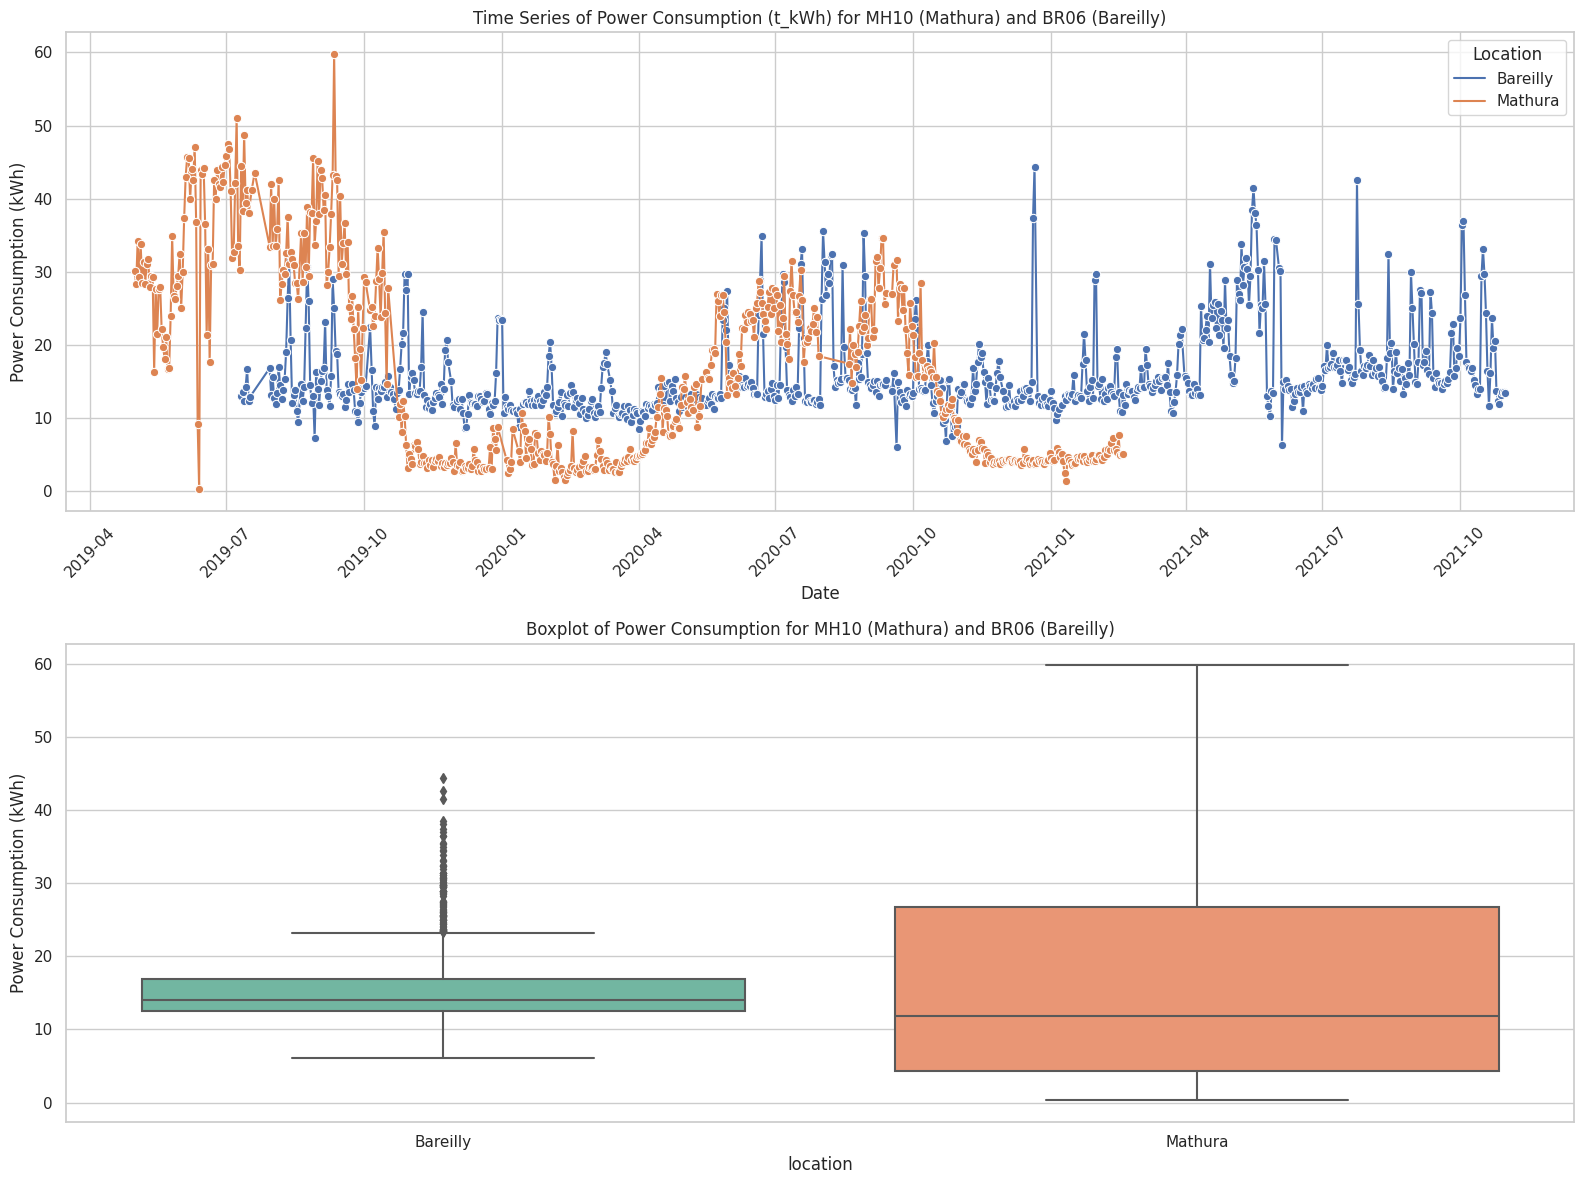

In [35]:
# Select meters for comparison
meters_to_compare = ['MH10', 'BR06']
# Filter data for these meters
df_compare = pd.concat([
    d1[d1["meter"] == 'BR06'],
    d2[d2["meter"] == 'MH10']
])
# Add a new column for location based on meter
df_compare['location'] = df_compare['meter'].apply(lambda x: 'Bareilly' if x == 'BR06' else 'Mathura')
# Set seaborn style
sns.set(style="whitegrid")
# Create figure and axes
fig, axs = plt.subplots(2, 1, figsize=(16, 12), sharex=False)
# 1. Time series plot of t_kWh
sns.lineplot(data=df_compare, x='Date', y='t_kWh', hue='location', ax=axs[0], marker='o')
axs[0].set_title('Time Series of Power Consumption (t_kWh) for MH10 (Mathura) and BR06 (Bareilly)')
axs[0].set_ylabel('Power Consumption (kWh)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend(title='Location')
# 2. Boxplot for distribution and outlier visualization
sns.boxplot(data=df_compare, x='location', y='t_kWh', palette='Set2', ax=axs[1])
axs[1].set_title('Boxplot of Power Consumption for MH10 (Mathura) and BR06 (Bareilly)')
axs[1].set_ylabel('Power Consumption (kWh)')
plt.tight_layout()
plt.show()

**Observations:**
While both meters represent the highest power demand in their respective locations, MH10 in Mathura has a wider and more volatile consumption profile with extreme peaks and low usage periods. In contrast, BR06 in Bareilly consumes power more consistently, with a tighter distribution of values and fewer extreme variations.
This difference could reflect underlying variations in user behavior, industrial activity, or infrastructure between the two regions. For energy planning and demand management, BR06 might allow for more predictable forecasting, whereas MH10 may require more dynamic strategies to handle its variability and peak loads.

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

2025-05-22 11:17:04.699738: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747912624.885839      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747912624.947319      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Processing meter: MH21
Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - loss: 0.1245 - val_loss: 0.0558
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0688 - val_loss: 0.0238
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0318 - val_loss: 0.0216
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0272 - val_loss: 0.0234
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0244 - val_loss: 0.0155
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0232 - val_loss: 0.0144
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0194 - val_loss: 0.0130
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0178 - val_loss: 0.0134
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0170 - val_loss: 0.0113
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0146 - val_loss: 0.0102
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0165 - val_loss: 0.0104
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.014

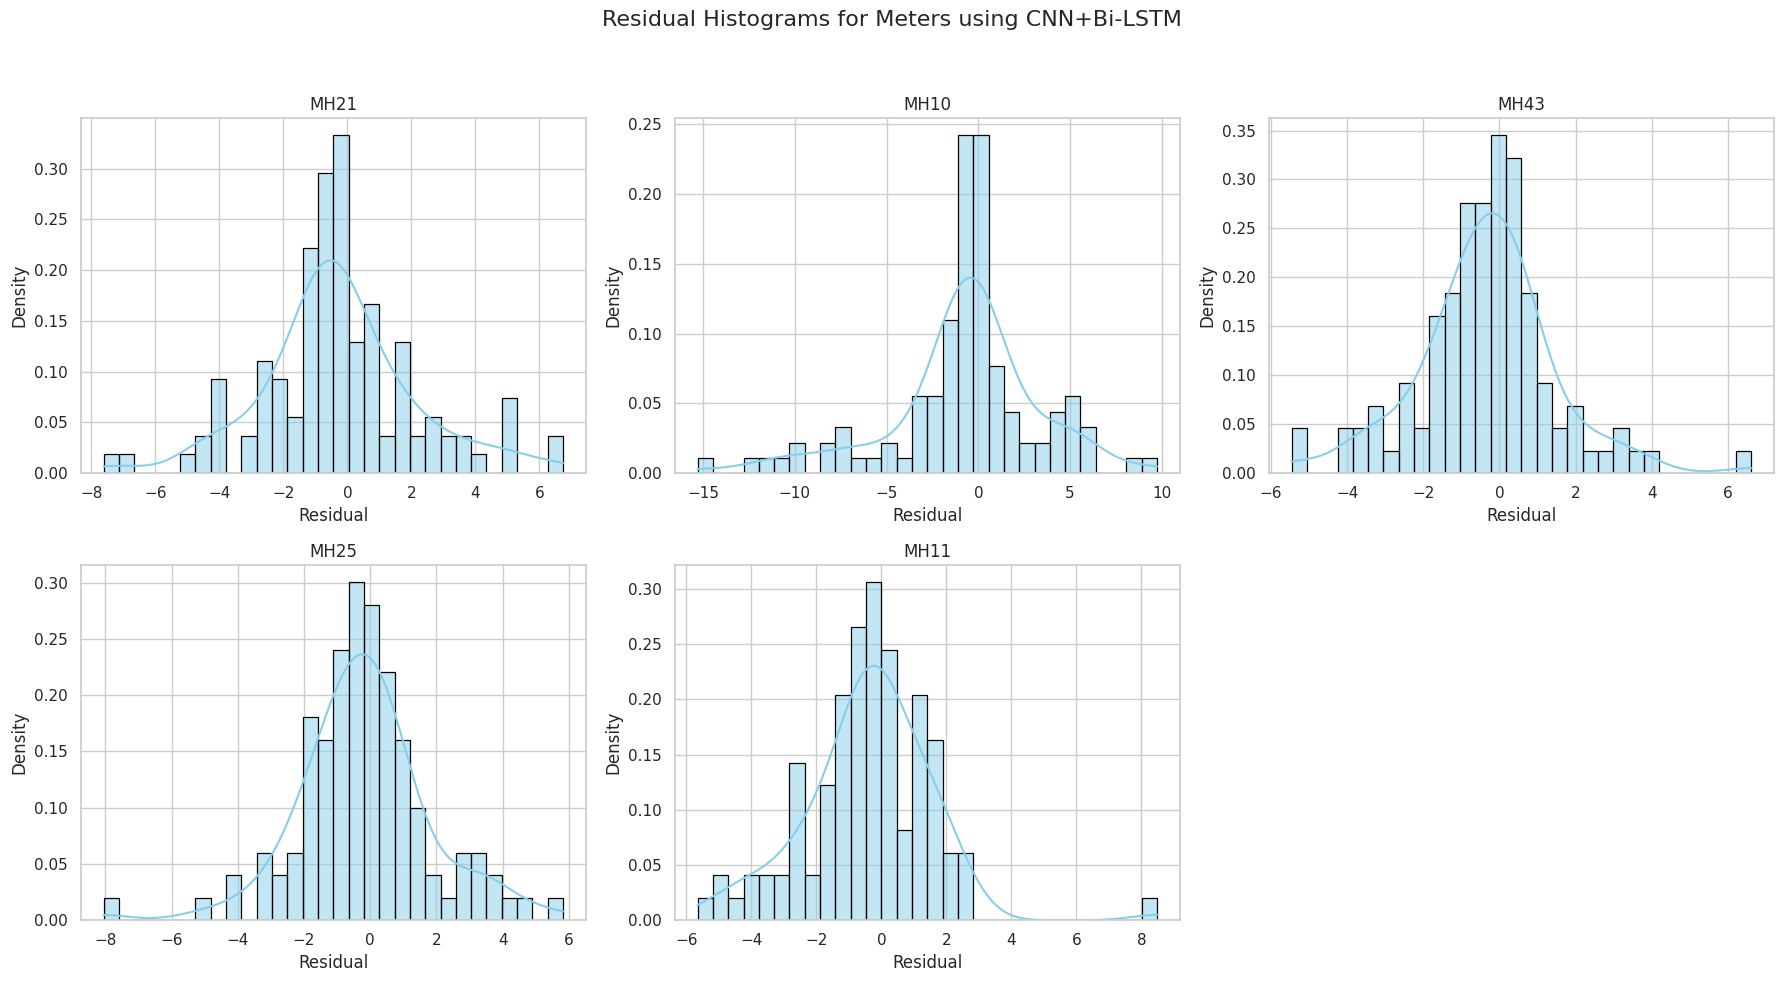

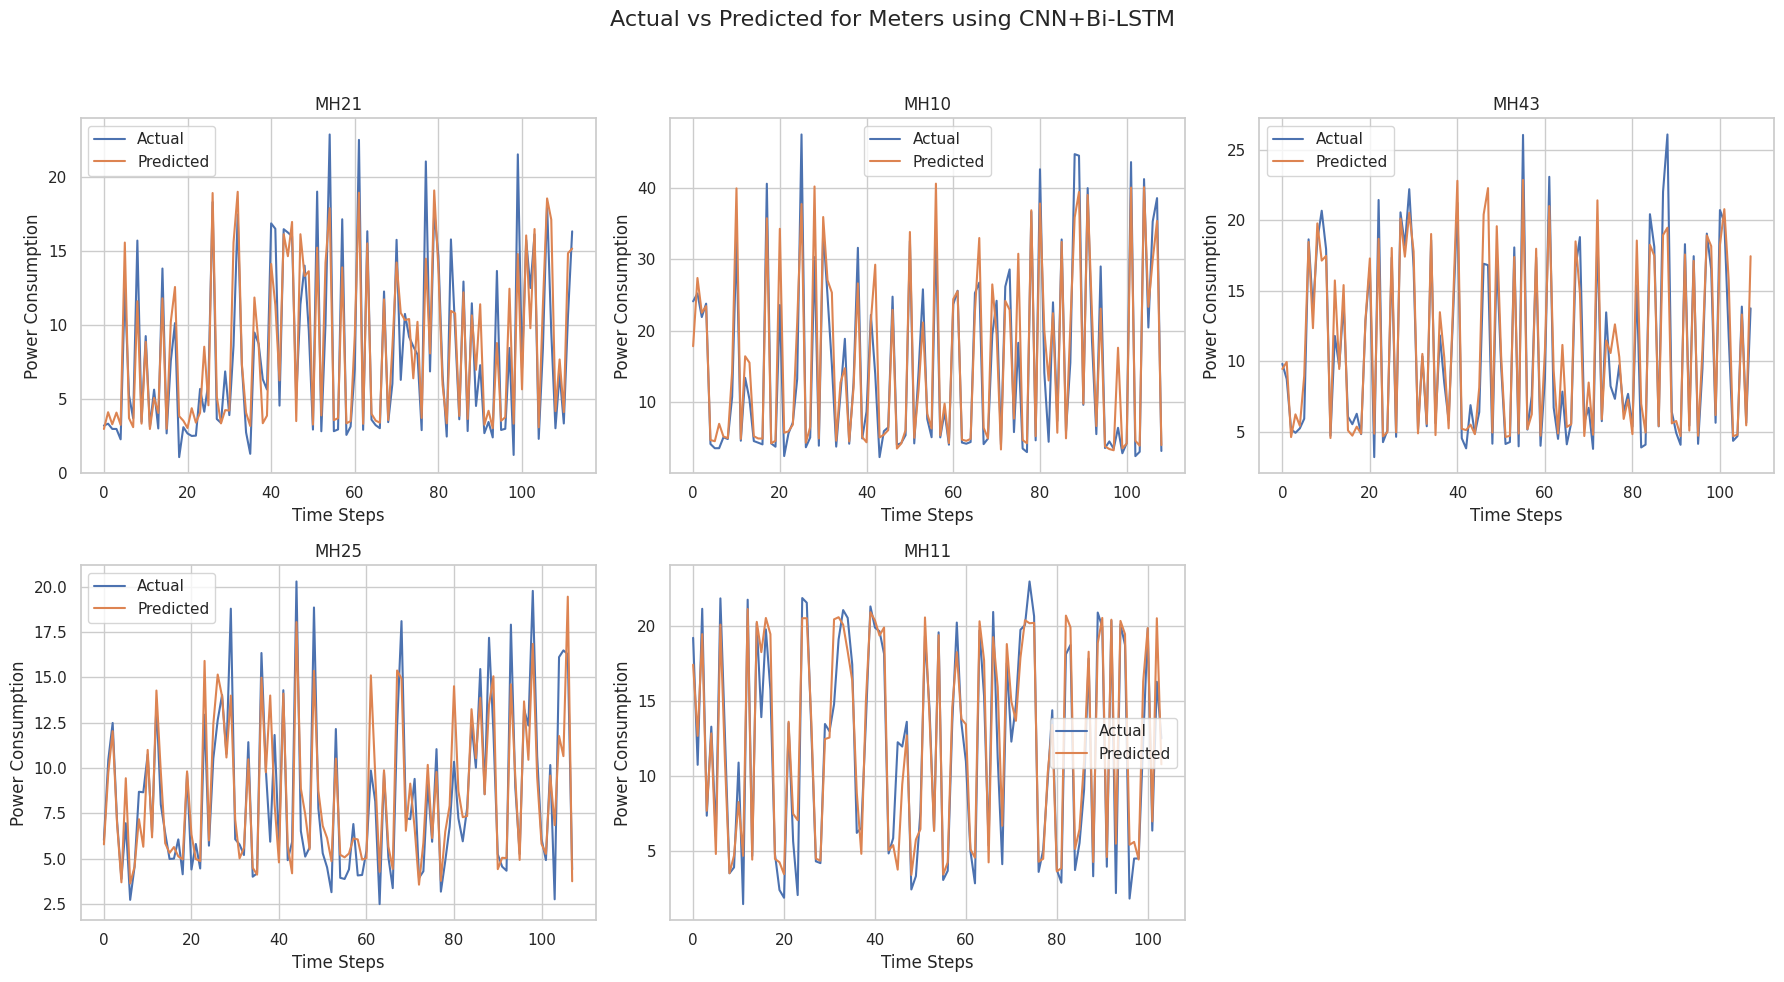

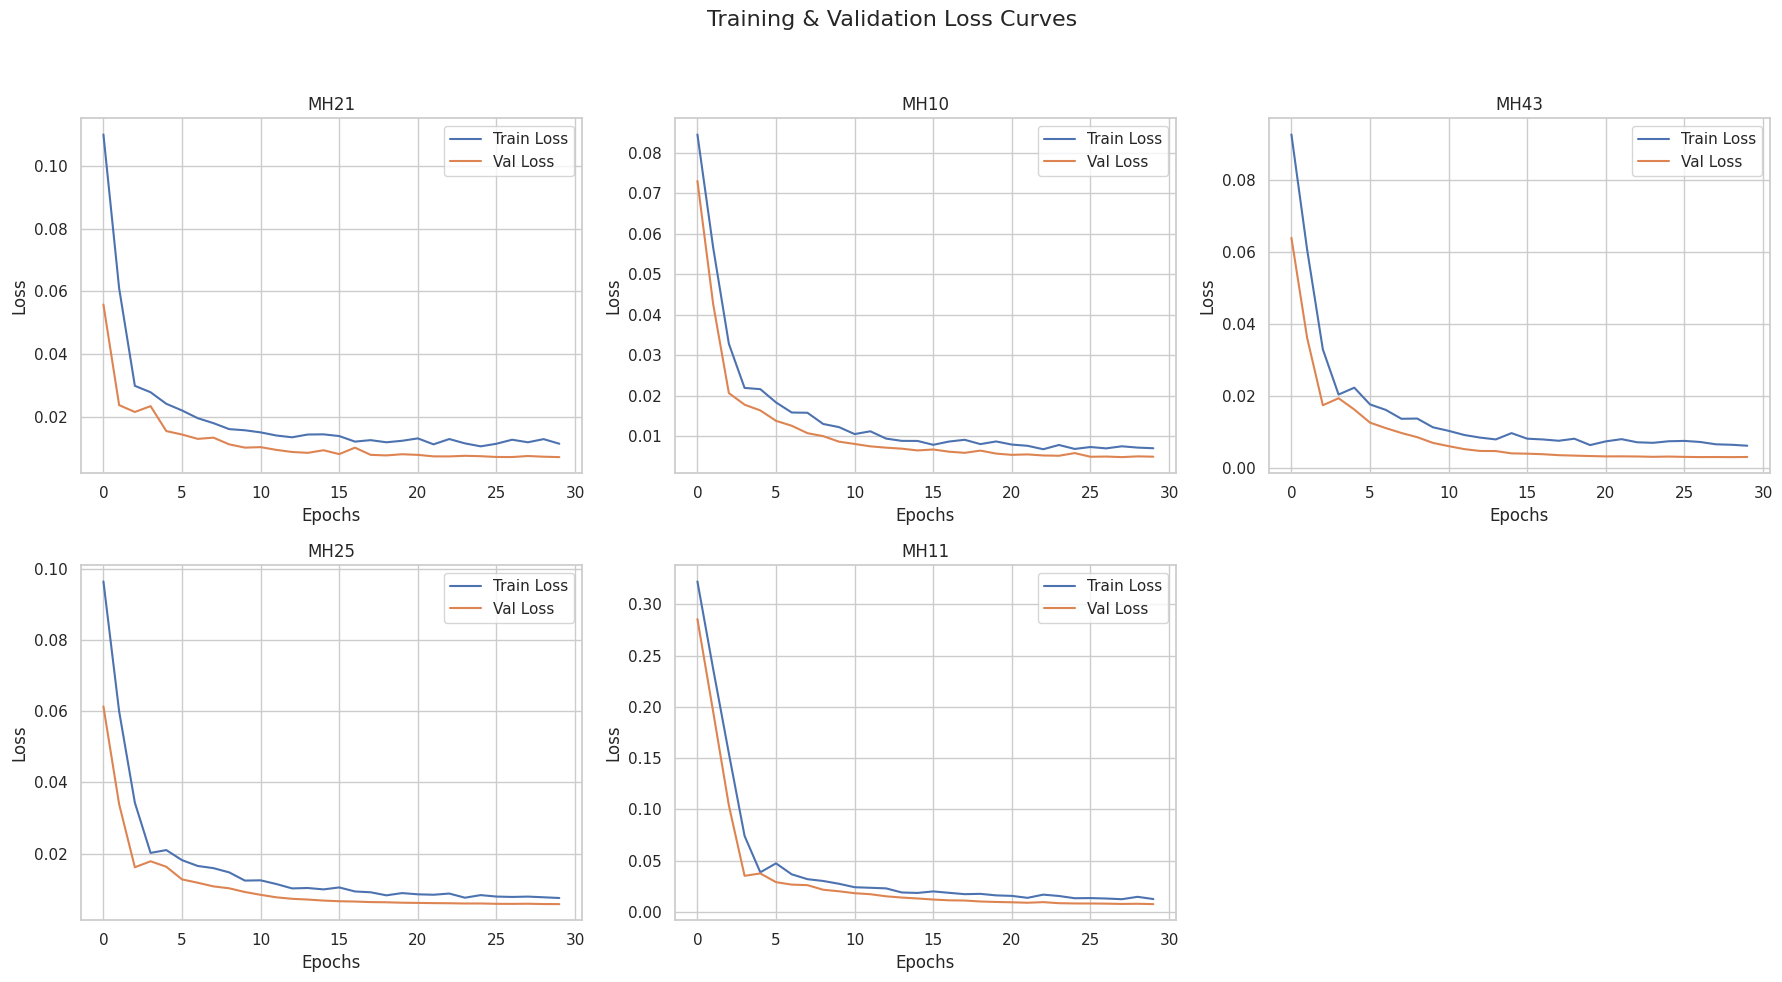

  meter  time_step  prediction  actual
0  MH21          0    2.973602   3.204
1  MH21          1    4.105716   3.330
2  MH21          2    3.288774   2.976
3  MH21          3    4.081690   2.975
4  MH21          4    3.251000   2.272


In [41]:
#CNN+Bi-LSTM
def fit_cnn_bi_lstm_individual(d2, look_back=60, epochs=30, batch_size=64):
    results = {}
    scaler = MinMaxScaler(feature_range=(0, 1))

    meters = ['MH21', 'MH10', 'MH43', 'MH25', 'MH11']

    residuals_list = []
    forecast_list = []
    loss_list = []

    # For collecting tidy predictions instead of dict with unequal length columns
    all_predictions = []

    for meter in meters:
        print(f"Processing meter: {meter}")

        meter_df = d2[d2['meter'] == meter].sort_values('Date')
        meter_data = meter_df['t_kWh'].values.reshape(-1, 1)

        # Scale the data
        meter_scaled = scaler.fit_transform(meter_data)

        def create_dataset(data, look_back):
            X, Y = [], []
            for i in range(look_back, len(data)):
                X.append(data[i - look_back:i, 0])
                Y.append(data[i, 0])
            return np.array(X), np.array(Y)

        X, y = create_dataset(meter_scaled, look_back)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        X_train = X_train.reshape(X_train.shape[0], look_back, 1, 1, 1)
        X_test = X_test.reshape(X_test.shape[0], look_back, 1, 1, 1)

        model = Sequential()
        model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu'), input_shape=(look_back, 1, 1, 1)))
        model.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        model.add(TimeDistributed(Conv2D(filters=128, kernel_size=(1, 1), activation='relu')))
        model.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu')))
        model.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        model.add(TimeDistributed(Flatten()))
        model.add(Bidirectional(LSTM(100, return_sequences=True)))
        model.add(Dropout(0.5))
        model.add(Bidirectional(LSTM(100, return_sequences=False)))
        model.add(Dropout(0.5))
        model.add(Dense(1))

        optimizer = Adam(learning_rate=0.0001)
        model.compile(optimizer=optimizer, loss='mean_squared_error')

        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                            validation_data=(X_test, y_test), verbose=1)

        y_pred = model.predict(X_test)

        y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

        residuals = y_test_inv.flatten() - y_pred_inv.flatten()

        residuals_list.append((meter, residuals))
        forecast_list.append((meter, y_test_inv.flatten(), y_pred_inv.flatten()))
        loss_list.append((meter, history.history['loss'], history.history['val_loss']))

        # Append predictions in tidy format
        df_preds = pd.DataFrame({
            'meter': meter,
            'time_step': np.arange(len(y_pred_inv)),
            'prediction': y_pred_inv.flatten(),
            'actual': y_test_inv.flatten()
        })
        all_predictions.append(df_preds)

        rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        r_squared = r2_score(y_test_inv, y_pred_inv)
        final_loss = history.history['loss'][-1]

        print(f"{meter} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r_squared:.4f}, Final Loss: {final_loss:.6f}")

        results[meter] = {
            'model': model,
            'predictions': y_pred_inv,
            'actuals': y_test_inv,
            'residuals': residuals,
            'metrics': {
                'RMSE': rmse,
                'MAE': mae,
                'R2': r_squared,
                'Loss': final_loss
            },
            'history': history.history
        }

    # Combine all predictions into one DataFrame (tidy format)
    prediction_df = pd.concat(all_predictions, ignore_index=True)

    # Plot residual histograms
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Residual Histograms for Meters using CNN+Bi-LSTM', fontsize=16)
    for idx, (meter, residuals) in enumerate(residuals_list):
        ax = axs[idx // 3, idx % 3]
        sns.histplot(residuals, kde=True, bins=30, stat='density', color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"{meter}")
        ax.set_xlabel('Residual')
        ax.set_ylabel('Density')
        ax.grid(True)
    # Remove any unused axes
    for idx in range(len(residuals_list), 6):
        fig.delaxes(axs[idx // 3, idx % 3])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Plot forecast vs actual
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Actual vs Predicted for Meters using CNN+Bi-LSTM', fontsize=16)
    for idx, (meter, actuals, preds) in enumerate(forecast_list):
        ax = axs[idx // 3, idx % 3]
        ax.plot(actuals, label='Actual')
        ax.plot(preds, label='Predicted')
        ax.set_title(f"{meter}")
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Power Consumption')
        ax.legend()
        ax.grid(True)
    # Remove unused axes
    for idx in range(len(forecast_list), 6):
        fig.delaxes(axs[idx // 3, idx % 3])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Plot loss curves
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Training & Validation Loss Curves', fontsize=16)
    for idx, (meter, loss, val_loss) in enumerate(loss_list):
        ax = axs[idx // 3, idx % 3]
        ax.plot(loss, label='Train Loss')
        ax.plot(val_loss, label='Val Loss')
        ax.set_title(f"{meter}")
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.grid(True)
    # Remove unused axes
    for idx in range(len(loss_list), 6):
        fig.delaxes(axs[idx // 3, idx % 3])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return results, prediction_df

results, prediction_df = fit_cnn_bi_lstm_individual(d2)
print(prediction_df.head())

Processing meter: BR28
Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 894ms/step - loss: 0.1528 - val_loss: 0.1019
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0940 - val_loss: 0.0491
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0397 - val_loss: 0.0139
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0162 - val_loss: 0.0191
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0190 - val_loss: 0.0130
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0184 - val_loss: 0.0121
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0162 - val_loss: 0.0116
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0161 - val_loss: 0.0103
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0125 - val_loss: 0.0095
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0113 - val_loss: 0.0090
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0114 - val_loss: 0.0083
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━

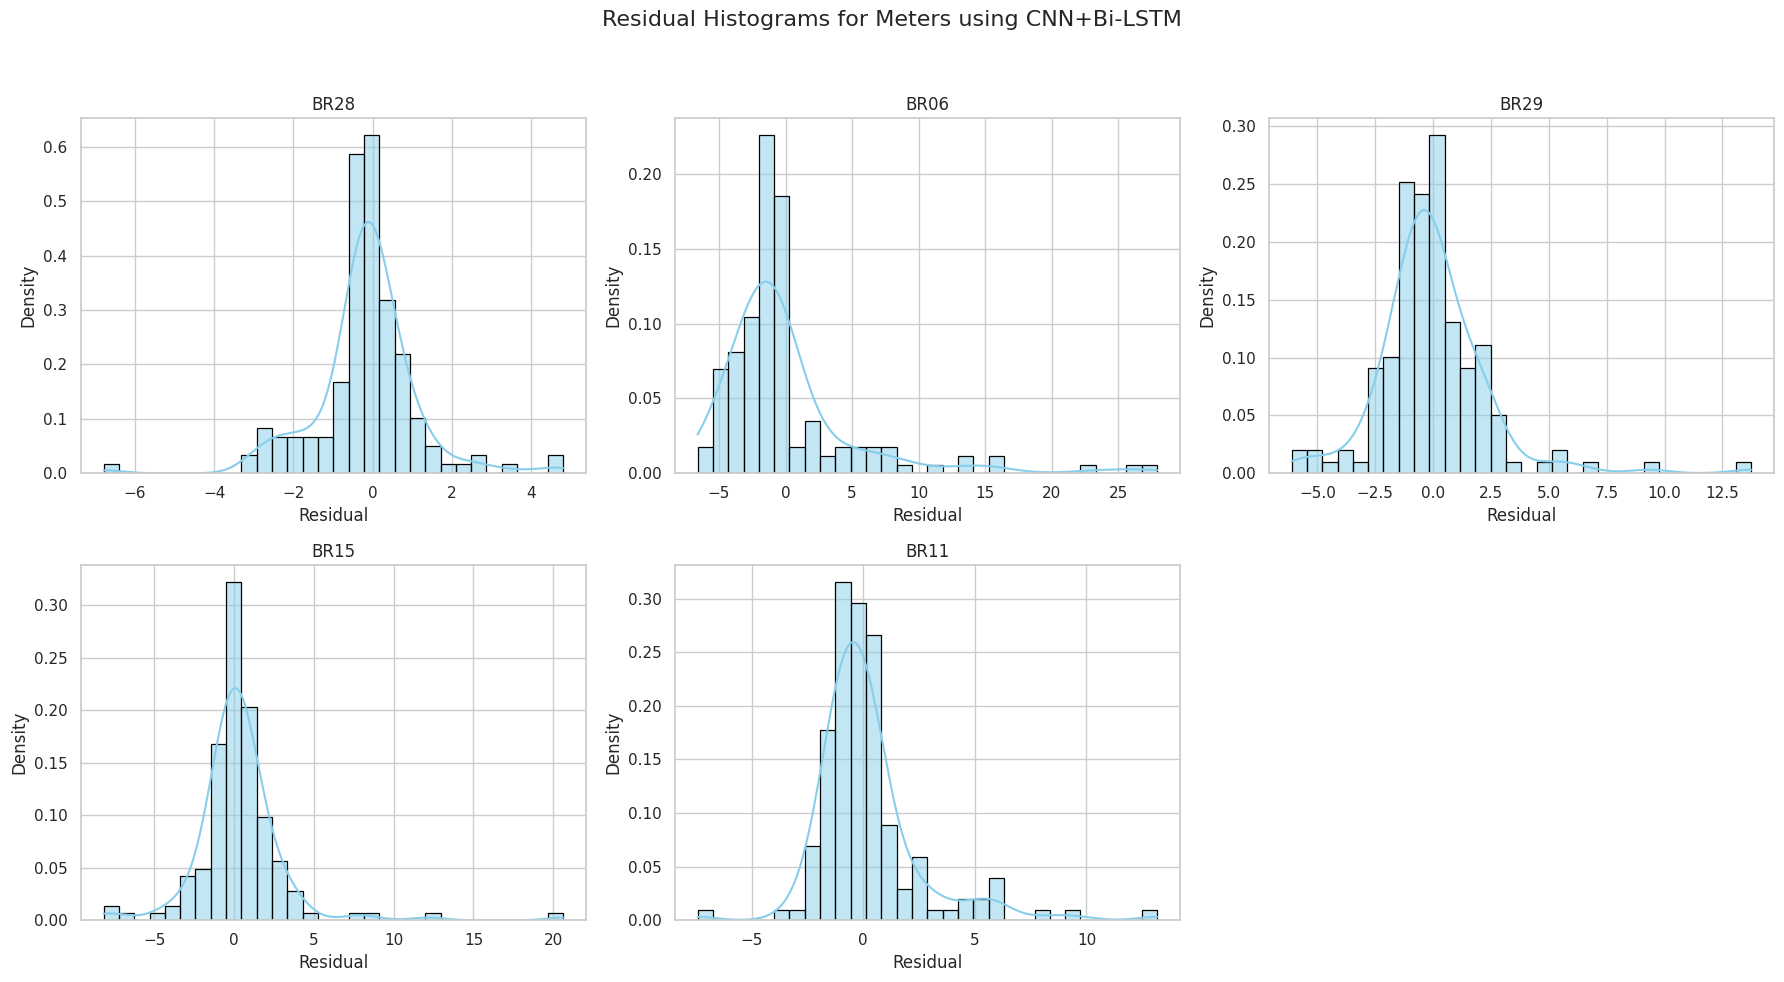

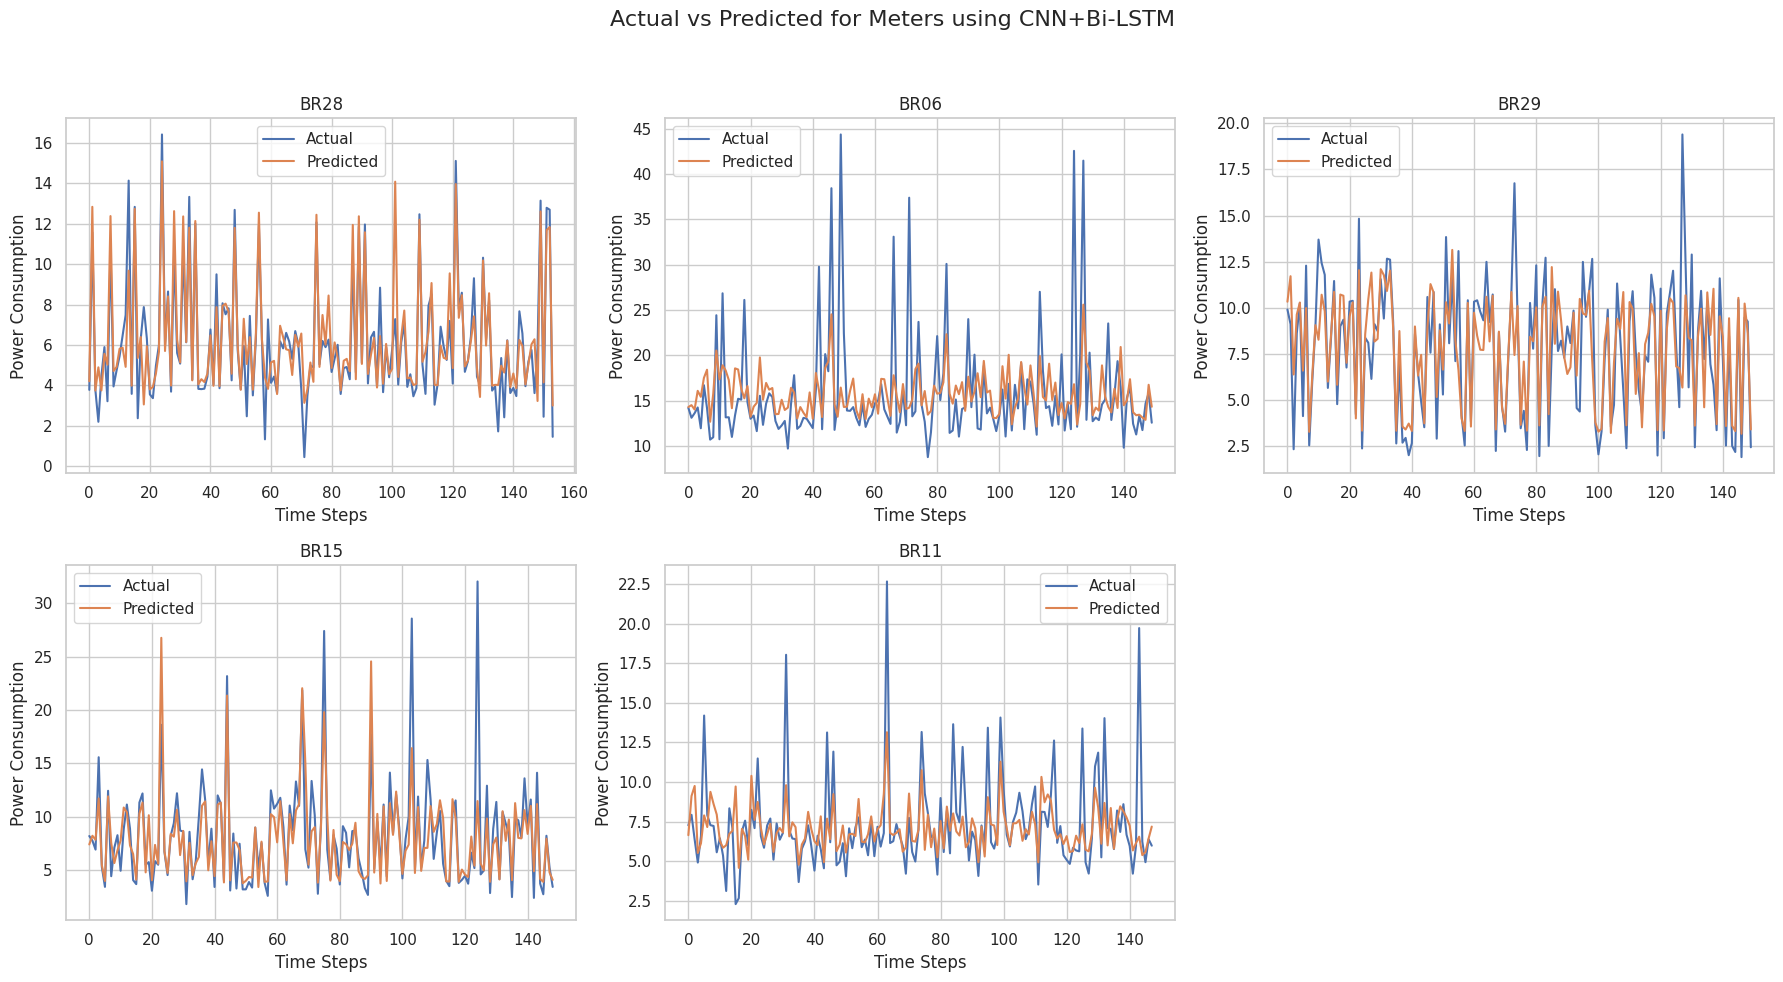

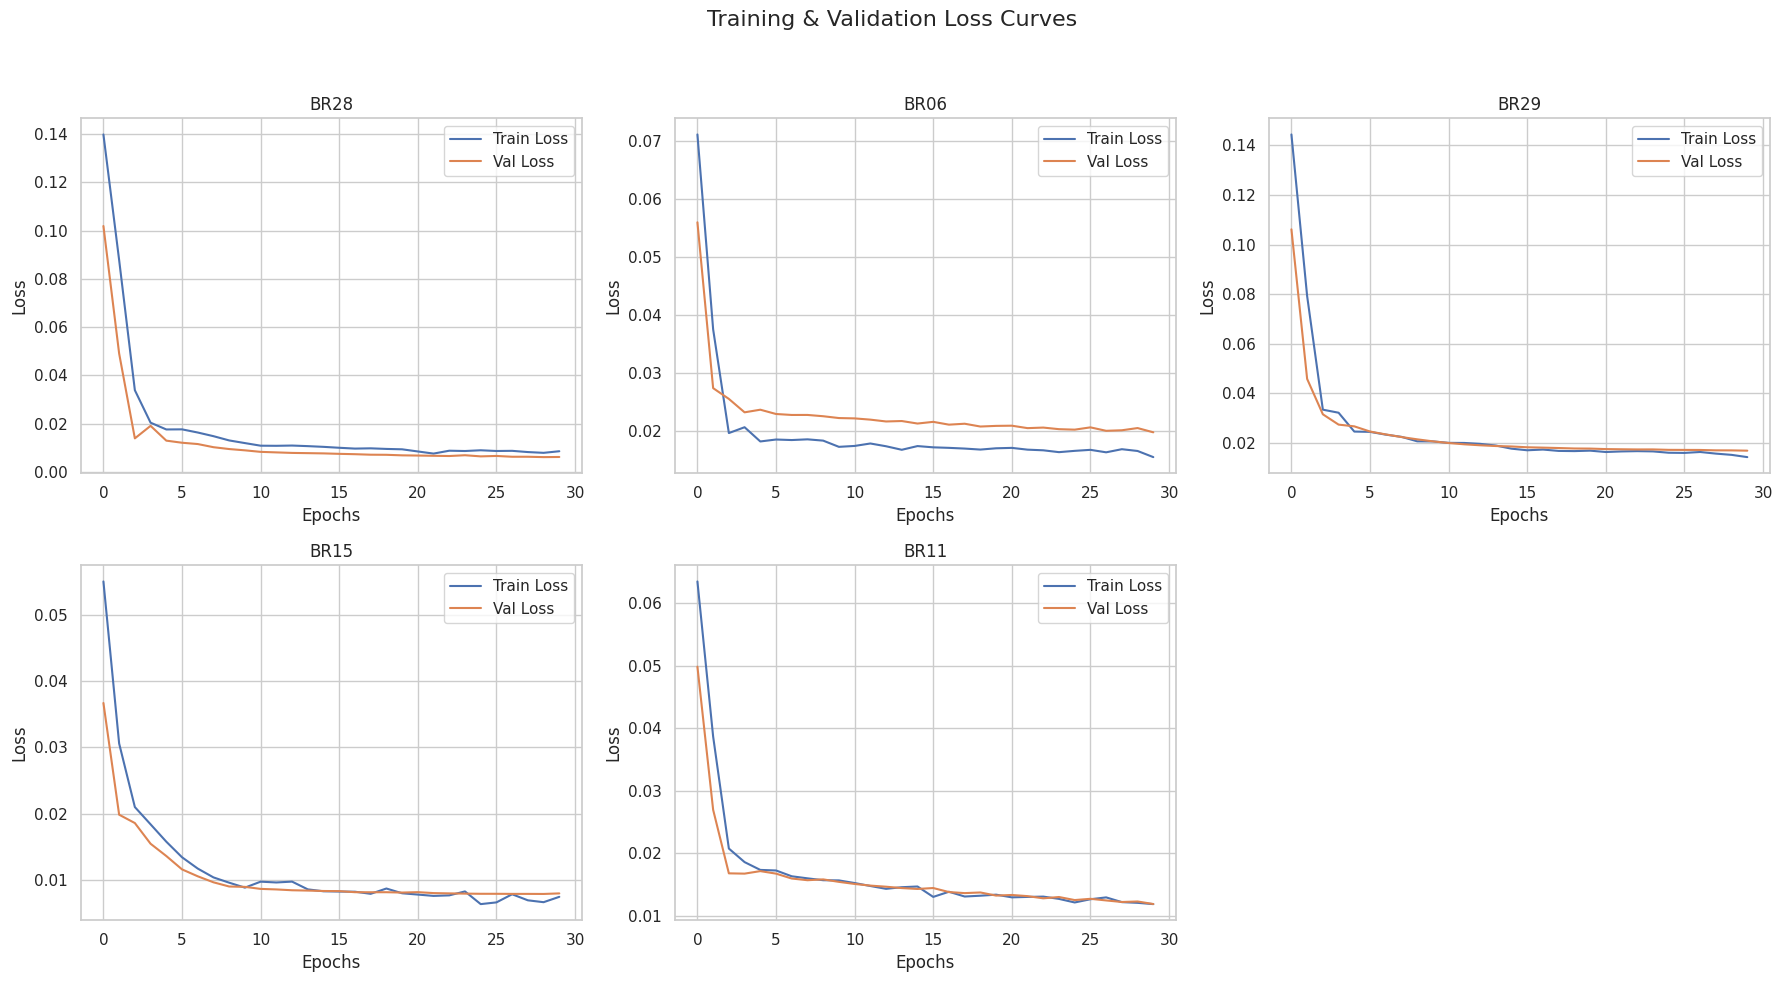

  meter  time_step  prediction  actual
0  BR28          0    4.208147   3.783
1  BR28          1   12.828649  11.562
2  BR28          2    3.749076   3.790
3  BR28          3    4.895437   2.205
4  BR28          4    3.754355   4.478


In [42]:
#CNN+Bi-LSTM
def fit_cnn_bi_lstm_individual(d1, look_back=60, epochs=30, batch_size=64):
    results = {}
    scaler = MinMaxScaler(feature_range=(0, 1))

    meters = ['BR28', 'BR06', 'BR29', 'BR15', 'BR11']

    residuals_list = []
    forecast_list = []
    loss_list = []

    # For collecting tidy predictions instead of dict with unequal length columns
    all_predictions = []

    for meter in meters:
        print(f"Processing meter: {meter}")

        meter_df = d1[d1['meter'] == meter].sort_values('Date')
        meter_data = meter_df['t_kWh'].values.reshape(-1, 1)

        # Scale the data
        meter_scaled = scaler.fit_transform(meter_data)

        def create_dataset(data, look_back):
            X, Y = [], []
            for i in range(look_back, len(data)):
                X.append(data[i - look_back:i, 0])
                Y.append(data[i, 0])
            return np.array(X), np.array(Y)

        X, y = create_dataset(meter_scaled, look_back)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        X_train = X_train.reshape(X_train.shape[0], look_back, 1, 1, 1)
        X_test = X_test.reshape(X_test.shape[0], look_back, 1, 1, 1)

        model = Sequential()
        model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu'), input_shape=(look_back, 1, 1, 1)))
        model.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        model.add(TimeDistributed(Conv2D(filters=128, kernel_size=(1, 1), activation='relu')))
        model.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu')))
        model.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        model.add(TimeDistributed(Flatten()))
        model.add(Bidirectional(LSTM(100, return_sequences=True)))
        model.add(Dropout(0.5))
        model.add(Bidirectional(LSTM(100, return_sequences=False)))
        model.add(Dropout(0.5))
        model.add(Dense(1))

        optimizer = Adam(learning_rate=0.0001)
        model.compile(optimizer=optimizer, loss='mean_squared_error')

        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                            validation_data=(X_test, y_test), verbose=1)

        y_pred = model.predict(X_test)

        y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

        residuals = y_test_inv.flatten() - y_pred_inv.flatten()

        residuals_list.append((meter, residuals))
        forecast_list.append((meter, y_test_inv.flatten(), y_pred_inv.flatten()))
        loss_list.append((meter, history.history['loss'], history.history['val_loss']))

        # Append predictions in tidy format
        df_preds = pd.DataFrame({
            'meter': meter,
            'time_step': np.arange(len(y_pred_inv)),
            'prediction': y_pred_inv.flatten(),
            'actual': y_test_inv.flatten()
        })
        all_predictions.append(df_preds)

        rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        r_squared = r2_score(y_test_inv, y_pred_inv)
        final_loss = history.history['loss'][-1]

        print(f"{meter} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r_squared:.4f}, Final Loss: {final_loss:.6f}")

        results[meter] = {
            'model': model,
            'predictions': y_pred_inv,
            'actuals': y_test_inv,
            'residuals': residuals,
            'metrics': {
                'RMSE': rmse,
                'MAE': mae,
                'R2': r_squared,
                'Loss': final_loss
            },
            'history': history.history
        }

    # Combine all predictions into one DataFrame (tidy format)
    prediction_df = pd.concat(all_predictions, ignore_index=True)

    # Plot residual histograms
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Residual Histograms for Meters using CNN+Bi-LSTM', fontsize=16)
    for idx, (meter, residuals) in enumerate(residuals_list):
        ax = axs[idx // 3, idx % 3]
        sns.histplot(residuals, kde=True, bins=30, stat='density', color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f"{meter}")
        ax.set_xlabel('Residual')
        ax.set_ylabel('Density')
        ax.grid(True)
    # Remove any unused axes
    for idx in range(len(residuals_list), 6):
        fig.delaxes(axs[idx // 3, idx % 3])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Plot forecast vs actual
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Actual vs Predicted for Meters using CNN+Bi-LSTM', fontsize=16)
    for idx, (meter, actuals, preds) in enumerate(forecast_list):
        ax = axs[idx // 3, idx % 3]
        ax.plot(actuals, label='Actual')
        ax.plot(preds, label='Predicted')
        ax.set_title(f"{meter}")
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Power Consumption')
        ax.legend()
        ax.grid(True)
    # Remove unused axes
    for idx in range(len(forecast_list), 6):
        fig.delaxes(axs[idx // 3, idx % 3])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Plot loss curves
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Training & Validation Loss Curves', fontsize=16)
    for idx, (meter, loss, val_loss) in enumerate(loss_list):
        ax = axs[idx // 3, idx % 3]
        ax.plot(loss, label='Train Loss')
        ax.plot(val_loss, label='Val Loss')
        ax.set_title(f"{meter}")
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.grid(True)
    # Remove unused axes
    for idx in range(len(loss_list), 6):
        fig.delaxes(axs[idx // 3, idx % 3])
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return results, prediction_df
    
results, prediction_df = fit_cnn_bi_lstm_individual(d1)
print(prediction_df.head())